In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.image as mpimg
from matplotlib import colors
from matplotlib.cm import ScalarMappable
from plot_utils import set_size

In [2]:
# PLOT PARAMETERS
plt.rcParams['font.size'] = 7                  
plt.rcParams['axes.titlesize'] = 6
plt.rcParams['lines.linewidth'] = 1           
plt.rcParams['lines.markersize'] = 3
plt.rcParams['figure.figsize'] = set_size(252,subplots=(2,1))
plt.rcParams['figure.figsize'] = (plt.rcParams['figure.figsize'][0],plt.rcParams['figure.figsize'][1]/2)
plt.rcParams['xtick.major.size'] = 3
plt.rcParams['xtick.major.width'] = 0.5
plt.rcParams['xtick.minor.size'] = 1.
plt.rcParams['xtick.minor.width'] = 0.5
plt.rcParams['ytick.major.size'] = 3
plt.rcParams['ytick.major.width'] = 0.5
plt.rcParams['ytick.minor.size'] = 1.
plt.rcParams['ytick.minor.width'] = 0.5
plt.rcParams['xtick.major.pad']=1.5
plt.rcParams['ytick.major.pad']=1.5
plt.rcParams['legend.fontsize'] = 7
plt.rcParams['legend.handlelength'] = plt.rcParams['legend.handleheight']
plt.rcParams['legend.columnspacing'] = 0.8
plt.rcParams['legend.handletextpad'] = 0.4

plt.rcParams['axes.linewidth'] = 0.5

fmt = 'eps'

In [3]:
params = {'fixed point' : {'beta' : 0.2, 'phi' : 540},
          'periodic' : {'beta' : 0.4, 'phi' : 360},
          'chaotic' :  {'beta' : 0.8, 'phi' : 90}}

path_fp = '../data/bifurcation_diagram/measoutfilefeed'+str(params['fixed point']['beta'])+'scal0phi'+str(params['fixed point']['phi'])+'bif.txt'
data_fp = np.genfromtxt(path_fp).reshape(-1,100)

path_per = '../data/bifurcation_diagram/measoutfilefeed'+str(params['periodic']['beta'])+'scal0phi'+str(params['periodic']['phi'])+'bif.txt'
data_per = np.genfromtxt(path_per).reshape(-1,100)

path_chaos = '../data/bifurcation_diagram/measoutfilefeed'+str(params['chaotic']['beta'])+'scal0phi'+str(params['chaotic']['phi'])+'bif.txt'
data_chaos = np.genfromtxt(path_chaos).reshape(-1,100)

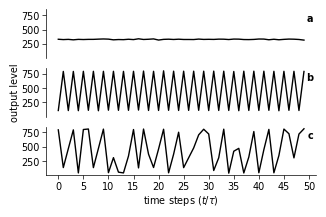

In [4]:
if fmt == 'pdf':
    raster = True
    dpi = 300
elif fmt == 'eps':
    raster = False
    dpi = None

plot_last = 50

fig,axes = plt.subplots(3,1,sharey=True)
ax_fp = axes[0]
ax_per = axes[1]
ax_chaos = axes[2]

#ax_fp = fig.add_subplot(3,1,1)
ax_fp.plot(data_fp[-plot_last:,0],color='black',rasterized=raster)

#ax_per = fig.add_subplot(3,1,2)
ax_per.plot(data_per[-plot_last:,0],color='black',rasterized=raster)

ax_chaos.plot(data_chaos[-plot_last:,0],color='black',rasterized=raster)

ax_per.set_ylabel('output level',labelpad=1)
ax_chaos.set_xlabel('time steps '+r'$(t/\tau)$',labelpad=1)

ax_fp.text(0.99,0.75,'a',weight='bold',transform=ax_fp.transAxes,ha='right')
ax_per.text(0.99,0.75,'b',weight='bold',transform=ax_per.transAxes,ha='right')
ax_chaos.text(0.99,0.75,'c',weight='bold',transform=ax_chaos.transAxes,ha='right')

ax_fp.spines['top'].set_visible(False)
ax_fp.spines['right'].set_visible(False)
ax_fp.spines['bottom'].set_visible(False)
ax_fp.set_xticks([])

ax_per.spines['top'].set_visible(False)
ax_per.spines['right'].set_visible(False)
ax_per.spines['bottom'].set_visible(False)
ax_per.set_xticks([])

ax_chaos.spines['top'].set_visible(False)
ax_chaos.spines['right'].set_visible(False)
ax_chaos.set_xticks(range(0,plot_last+5,5))



#plt.savefig('eps/fig02_time_series.eps',dpi=dpi,bbox_inches='tight')